Question 1. What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.  
- **Artificial Intelligence (AI) :** AI describes how computer and technology mimics human intelligence, or in other way smart applications that can perform a task without human intervention. AI uses a wide range of methods, including logic, decision trees, and machine learning.  
Example: A chatbot that understands and responds to user queries or an autopilot system for a car.  

- **Machine Learning (ML) :** Machine learning focuses on creating algorithms and statistical models to let computers learn and make predictions without explicitly programmed. ML uses statistical models to find patterns in data and make predictions or decisions, improving with more data.  
Example: A recommendation system that suggests products based on your past purchases or a spam filter that learns to identify unwanted emails.

- **Deep Learning (DL) :** Deep Learning is specialized ML algotithms that uses artificial neural networks with multiple layers to analyze data. DL mimics the structure of the human brain, breaking down complex problems into simpler parts. It is particularly effective with large, unstructured datasets.
Example: Image recognition, where DL models can identify objects in a photo, or natural language processing for tasks like sentiment analysis.

- **Data Science (DS) :** Data Science is a multidisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It involves the entire data lifecycle, including sourcing, cleaning, analyzing, and visualizing data. Data scientists often use AI and ML tools to achieve their goals.
Example: Analyzing healthcare data to identify disease trends or using data to forecast market changes.

Question 2. Explain overfitting and underfitting in ML. How can you detect and prevent them?
- **Overfitting :** Overfitting occurs when a model learns the training data too well, including its noise and irrelevant details. This results in excellent performance on the training set but poor performance on new, unseen data. The model essentially memorizes the training examples rather than learning the underlying patterns.  

- **Underfitting :** Underfitting occurs when a model is too simple and fails to capture the underlying patterns in the training data. This leads to poor performance on both the training set and new, unseen data. The model is not complex enough to represent the true relationships within the data.

- We can detect them by their performance on training vs. test sets -
**Overfitting:** High accuracy/low error on the training set, but significantly lower accuracy/higher error on the test set.  
**Underfitting:** Low accuracy/high error on both training and test sets.

- To prevent Overfitting we need - More data, Regularization, Early stopping, Feature selection, Cross-validation, Ensemble methods.  
- To prevent Underfitting we need More complex model, More features, Reduce regularization, Longer training.

Question 3. How would you handle missing values in a dataset? Explain at least three methods with examples.
- Handling missing values is a crucial step in data preprocessing. Here are three methods with examples:
1. **Deletion :** This involves removing rows (listwise deletion) or columns (feature deletion) that contain missing values.  
Example (Listwise Deletion): If a dataset has a few rows with missing values across multiple columns, and the number of such rows is small relative to the total dataset size, removing these rows might be acceptable to maintain data quality.  
Example (Feature Deletion): If a specific column has a very high percentage of missing values (e.g., more than 80%), and it's not a critical feature, dropping the entire column might be the most practical approach to avoid introducing bias through imputation.

2. **Imputation with Central Tendency :** Replacing missing values with a measure of central tendency (mean, median, or mode) of the non-missing values in that specific column.
Example (Mean Imputation for Numerical Data): For numerical features, the mean can be used to fill missing values, especially if the data is approximately normally distributed and outliers are not a major concern.
Example (Mode Imputation for Categorical Data): For categorical features, the mode is often used to impute missing values.

3. **Imputation with Advanced Techniques (e.g., Forward/Backward Fill for Time Series) :** For time-series data, methods like forward fill (filling with the previous valid observation) or backward fill (filling with the next valid observation) can be effective in maintaining temporal relationships.
Example (Forward Fill): If a sensor reading is missing, using the last recorded value can be a reasonable approximation.

Question 4. What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).
- An imbalanced dataset is one where the distribution of classes within the target variable is unequal; specifically, the number of instances belonging to one class significantly outweighs the number of instances in another class.
- Here are two techniques to handle imbalanced datasets -
    1. **Resampling (Oversampling using SMOTE) :** SMOTE addresses the imbalance by creating synthetic samples of the minority class rather than simply duplicating existing ones (random oversampling). It works by selecting a minority instance and finding its k nearest minority neighbors. It then draws a line between them in the feature space and generates a new, synthetic data point along that line. This approach introduces diversity into the minority class data and helps prevent overfitting that might occur with simple duplication.

        **Practical :**

        from imblearn.over_sampling import SMOTE  
        from sklearn.model_selection import train_test_split  
        from sklearn.ensemble import RandomForestClassifier  
        from sklearn.metrics import classification_report  
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  
        smote = SMOTE(random_state=42)  
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)  
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train_balanced, y_train_balanced)   
        predictions = model.predict(X_test)
        print(classification_report(y_test, predictions))

    2. **Algorithmic Modification (Class Weighting) :** Class weighting works by assigning a higher penalty or weight to misclassification errors made on the minority class instances compared to errors made on the majority class. The algorithm is incentivized to correctly classify the rare examples because getting them wrong is "more expensive" in terms of the total loss it needs to minimize. Many common machine learning libraries handle the calculation of these weights automatically, often based on the inverse frequency of the classes.

        **Practical :**

        from sklearn.ensemble import RandomForestClassifier
        from sklearn.svm import SVC  
        from sklearn.linear_model import LogisticRegression  
        from sklearn.model_selection import train_test_split  
        from sklearn.metrics import classification_report  
        log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)  
        log_reg_model.fit(X_train, y_train)  
        svc_model = SVC(class_weight='balanced', random_state=42)  
        svc_model.fit(X_train, y_train)  
        log_reg_predictions = log_reg_model.predict(X_test)  
        print("Logistic Regression Report:")  
        print(classification_report(y_test, log_reg_predictions))  
        svc_predictions = svc_model.predict(X_test)  
        print("\nSVC Report:")  
        print(classification_report(y_test, svc_predictions))

Question 5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.
- Feature scaling is crucial in machine learning to prevent features with larger ranges from dominating the model and to help algorithms converge faster. It ensures all features are on a similar scale, allowing for better comparison and more effective training.  
**Min-Max Scaling vs. Standardization :**
| Feature           | Min-Max Scaling                                                                                                        | Standardization                                                                                                      |
|-------------------|------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **Transformation** | Rescales the data to a fixed range, usually \([0,1]\).                                                                  | Transforms the data to have a mean of \(0\) and a standard deviation of \(1\).                                    |
| **Formula**       | $$
X_{\text{scaled }}=\frac{X_{i}-X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}
$$                                  | $$
X_{\text{scaled }}=\frac{X_{i}-\mu }{\sigma }
$$                                                               |
| **Impact of Outliers** | Sensitive to outliers because the min and max values are used in the calculation, which can be skewed by extreme values. | Less sensitive to outliers than Min-Max scaling because the mean and standard deviation are less affected by extreme values. |
| **Distribution**  | Preserves the original distribution's shape but compresses it into the target range.                                   | The new distribution is centered around 0. While it centers the data, it doesn't guarantee a specific range like Min-Max scaling does. |
| **Best for**      | Algorithms that require data in a fixed range, such as neural networks.                                                | Algorithms that assume a Gaussian distribution, or when you need to handle outliers more gracefully.                 |

Question 6. Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?
- Label Encoding assigns a unique integer to each category, suitable for ordinal data with a natural order, while One-Hot Encoding creates a new binary column for each category, best for nominal data without an order. Choose One-Hot Encoding for nominal data to avoid creating false ordinal relationships, Use Label Encoding for ordinal data or when the number of unique categories is very high to prevent high dimensionality and computational cost.  
**Label Encoding :** Assigns a unique integer to each category  
    - Categorical features with a natural, inherent order (e.g., education levels, income groups).  
    - When dealing with a very large number of unique categories (high cardinality) to avoid a significant increase in dimensionality.  

   **One-Hot Encoding :** Creates a new binary (0 or 1) column for each unique category.
    - Nominal features where there is no inherent order (e.g., colors, city names).
    - Algorithms that are sensitive to the ordinal relationships that Label Encoding might introduce, such as linear models.


Question 7: Google Play Store Dataset  
a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?  
Dataset: https://github.com/MasteriNeuron/datasets.git

Categories with the highest average ratings:
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
Name: Rating, dtype: float64

Categories with the lowest average ratings:
Category
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613
TOOLS                  4.047411
DATING                 3.970769
Name: Rating, dtype: float64


/tmp/ipython-input-3690115092.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_ratings.values, y=cat_ratings.index, palette='viridis')


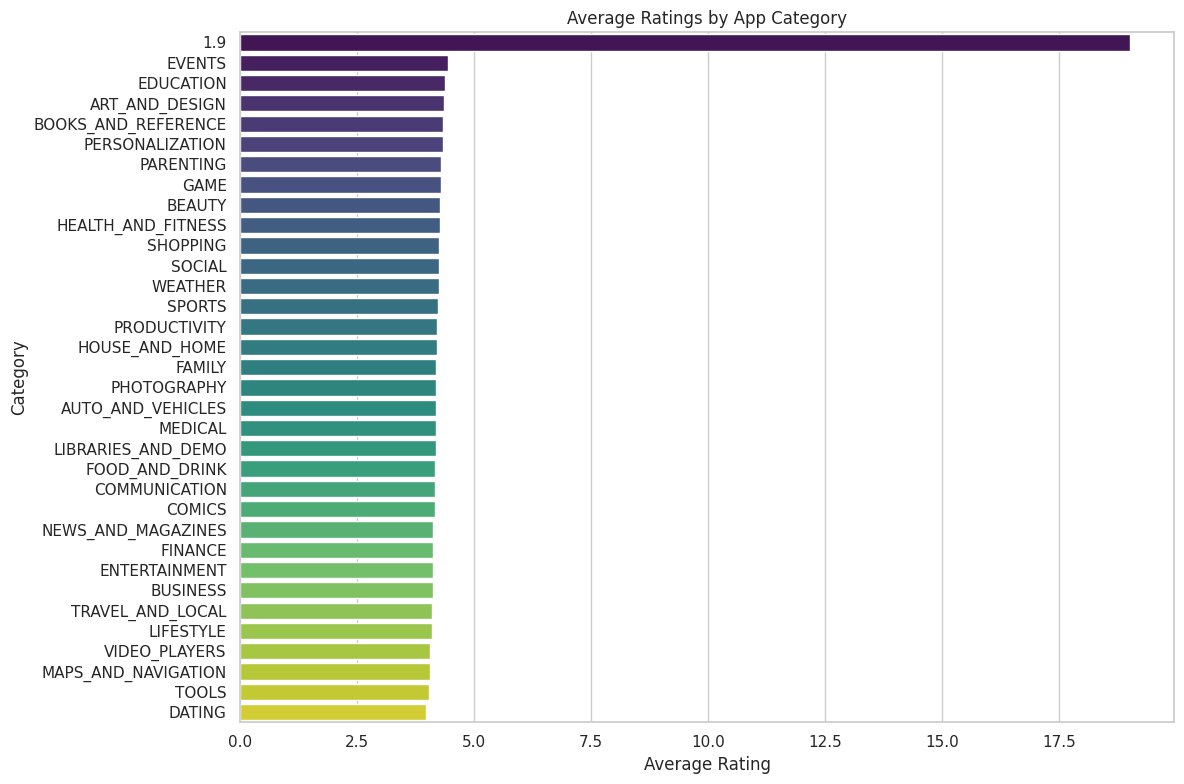

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("googleplaystore.csv")

cat_ratings = df.groupby("Category")['Rating'].mean().sort_values(ascending=False)

print("Categories with the highest average ratings:")
print(cat_ratings.head())

print("\nCategories with the lowest average ratings:")
print(cat_ratings.tail())

# Plotting the average ratings by category
plt.figure(figsize=(12, 8))
sns.barplot(x=cat_ratings.values, y=cat_ratings.index, palette='viridis')
plt.title('Average Ratings by App Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Question 8: Titanic Dataset  
a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?  
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?  
Dataset: https://github.com/MasteriNeuron/datasets.git

/tmp/ipython-input-955961369.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="viridis")


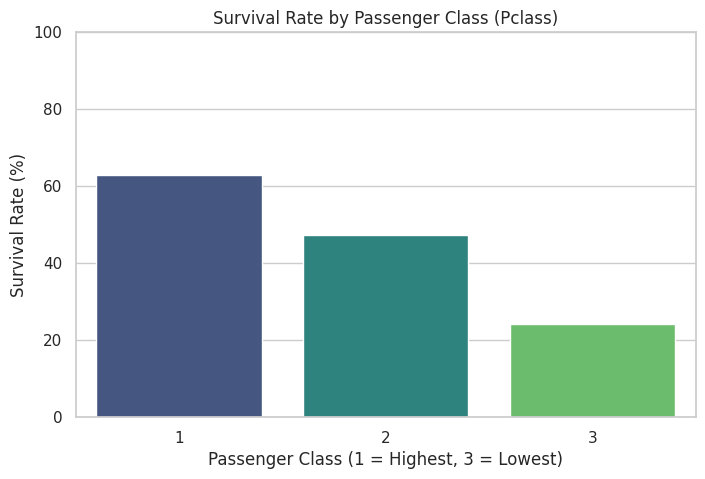

Survival Rate by Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [7]:
#Answer (a)

df = pd.read_csv("titanic.csv")
survival_by_class = df.groupby('Pclass')['Survived'].mean()*100

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette="viridis")
plt.title("Survival Rate by Passenger Class (Pclass)")
plt.xlabel("Passenger Class (1 = Highest, 3 = Lowest)")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()

# Print the survival rates
print("Survival Rate by Class:")
print(survival_by_class)

In [ ]:
# Observations:
# ● 1st Class (Pclass=1) had the highest survival rate (~63%).
# ● 3rd Class (Pclass=3) had the lowest survival rate (~24%).
# Why?
# ● 1st-class passengers had priority access to lifeboats.
# ● 3rd-class passengers were located in lower decks, making evacuation harder.

/tmp/ipython-input-3619838863.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette="pastel")


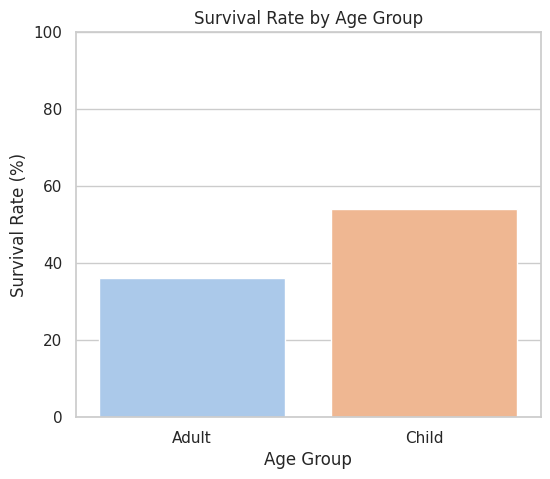


Survival Rate by Age Group:
Age_Group
Adult    36.118252
Child    53.982301
Name: Survived, dtype: float64


In [8]:
# Answer (b)
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

survival_by_age = df.groupby('Age_Group')['Survived'].mean() * 100

plt.figure(figsize=(6, 5))
sns.barplot(x=survival_by_age.index, y=survival_by_age.values, palette="pastel")
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.show()

print("\nSurvival Rate by Age Group:")
print(survival_by_age)

In [ ]:
# Observations:
# ● Children (<18) had a higher survival rate (~54%) compared to adults (~37%).
# Why?
# ● The "Women and Children First" policy prioritized children for lifeboats.
# ● Adults (especially men) were more likely to stay behind.

Question 9: Flight Price Prediction Dataset  
a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.  
b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why?  
Dataset: https://github.com/MasteriNeuron/datasets.git


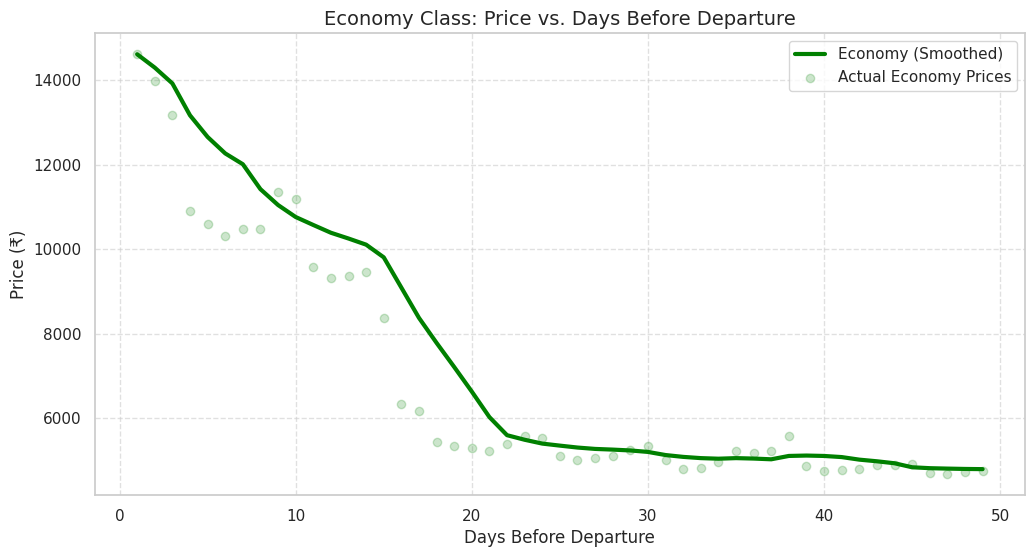

Best Economy booking: 47 days before (₹4669.65)


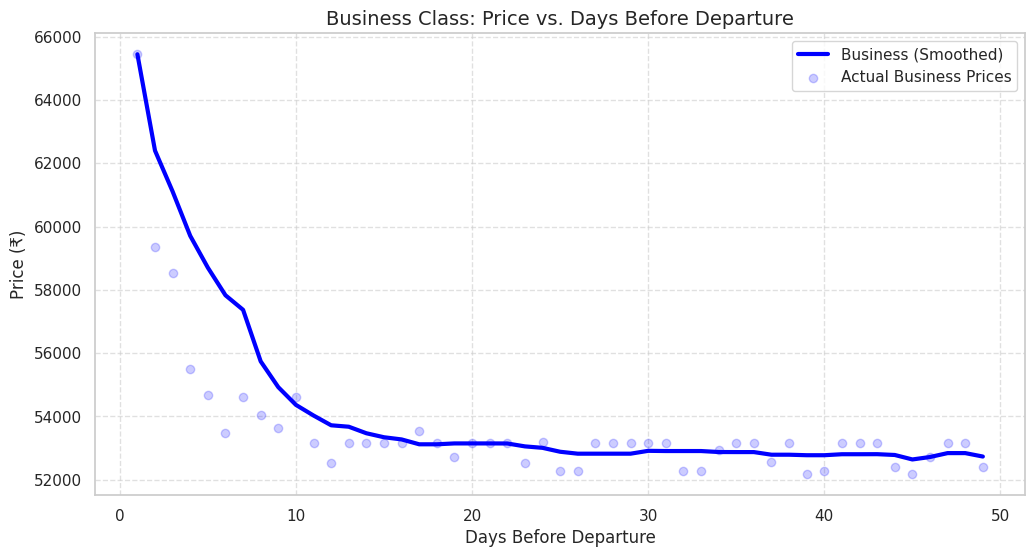

Best Business booking: 39 days before (₹52175.00)


In [23]:
# Answer (a)

df = pd.read_csv('flight_price.csv')

flights = df.drop(columns=['Unnamed: 0'])

economy = flights[flights['class'] == 'Economy']
business = flights[flights['class'] == 'Business']

eco_trend = economy.groupby('days_left')['price'].mean().reset_index()

eco_trend['smoothed'] = eco_trend['price'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(eco_trend['days_left'], eco_trend['smoothed'], color='green', linewidth=3, label='Economy (Smoothed)')
plt.scatter(eco_trend['days_left'], eco_trend['price'], alpha=0.2, color='green', label='Actual Economy Prices')
plt.title("Economy Class: Price vs. Days Before Departure", fontsize=14)
plt.xlabel("Days Before Departure", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

best_eco = eco_trend[eco_trend['price'] == eco_trend['price'].min()]
print(f"Best Economy booking: {best_eco['days_left'].values[0]} days before (₹{best_eco['price'].values[0]:.2f})")

biz_trend = business.groupby('days_left')['price'].median().reset_index()

biz_trend['smoothed'] = biz_trend['price'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(biz_trend['days_left'], biz_trend['smoothed'], color='blue', linewidth=3, label='Business (Smoothed)')
plt.scatter(biz_trend['days_left'], biz_trend['price'], alpha=0.2, color='blue', label='Actual Business Prices')
plt.title("Business Class: Price vs. Days Before Departure", fontsize=14)
plt.xlabel("Days Before Departure", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

best_biz = biz_trend[biz_trend['price'] == biz_trend['price'].min()]
print(f"Best Business booking: {best_biz['days_left'].values[0]} days before (₹{best_biz['price'].values[0]:.2f})")

/tmp/ipython-input-3953151804.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_prices.index, y=airline_prices.values, palette='viridis')


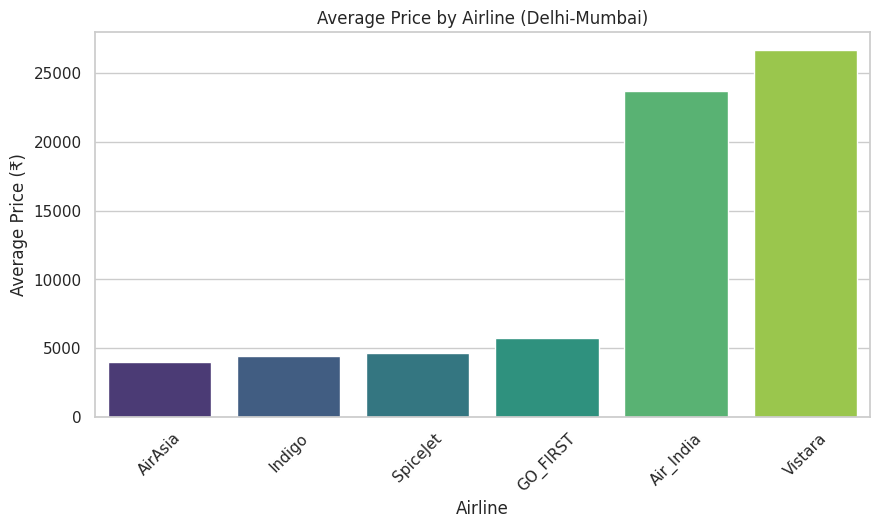


Cheapest Airlines:
airline
AirAsia     3981.191456
Indigo      4473.739130
SpiceJet    4628.251984
Name: price, dtype: float64

Most Expensive Airlines:
airline
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64


In [24]:
# Answer (b)

delhi_mumbai = flights[(flights['source_city'] == 'Delhi') & (flights['destination_city'] == 'Mumbai')]

airline_prices = delhi_mumbai.groupby('airline')['price'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=airline_prices.index, y=airline_prices.values, palette='viridis')
plt.title("Average Price by Airline (Delhi-Mumbai)")
plt.xlabel("Airline")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.show()

print("\nCheapest Airlines:")
print(airline_prices.head(3))
print("\nMost Expensive Airlines:")
print(airline_prices.tail(3))

Question 10: HR Analytics Dataset  
a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).  
b). Are employees with more projects more likely to leave?  
Dataset: hr_analytics

/tmp/ipython-input-4009662060.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='satisfaction_level', data=df, palette="viridis")
/tmp/ipython-input-4009662060.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='average_montly_hours', data=df, palette="viridis")
/tmp/ipython-input-4009662060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='time_spend_company', data=df, palette="viridis")


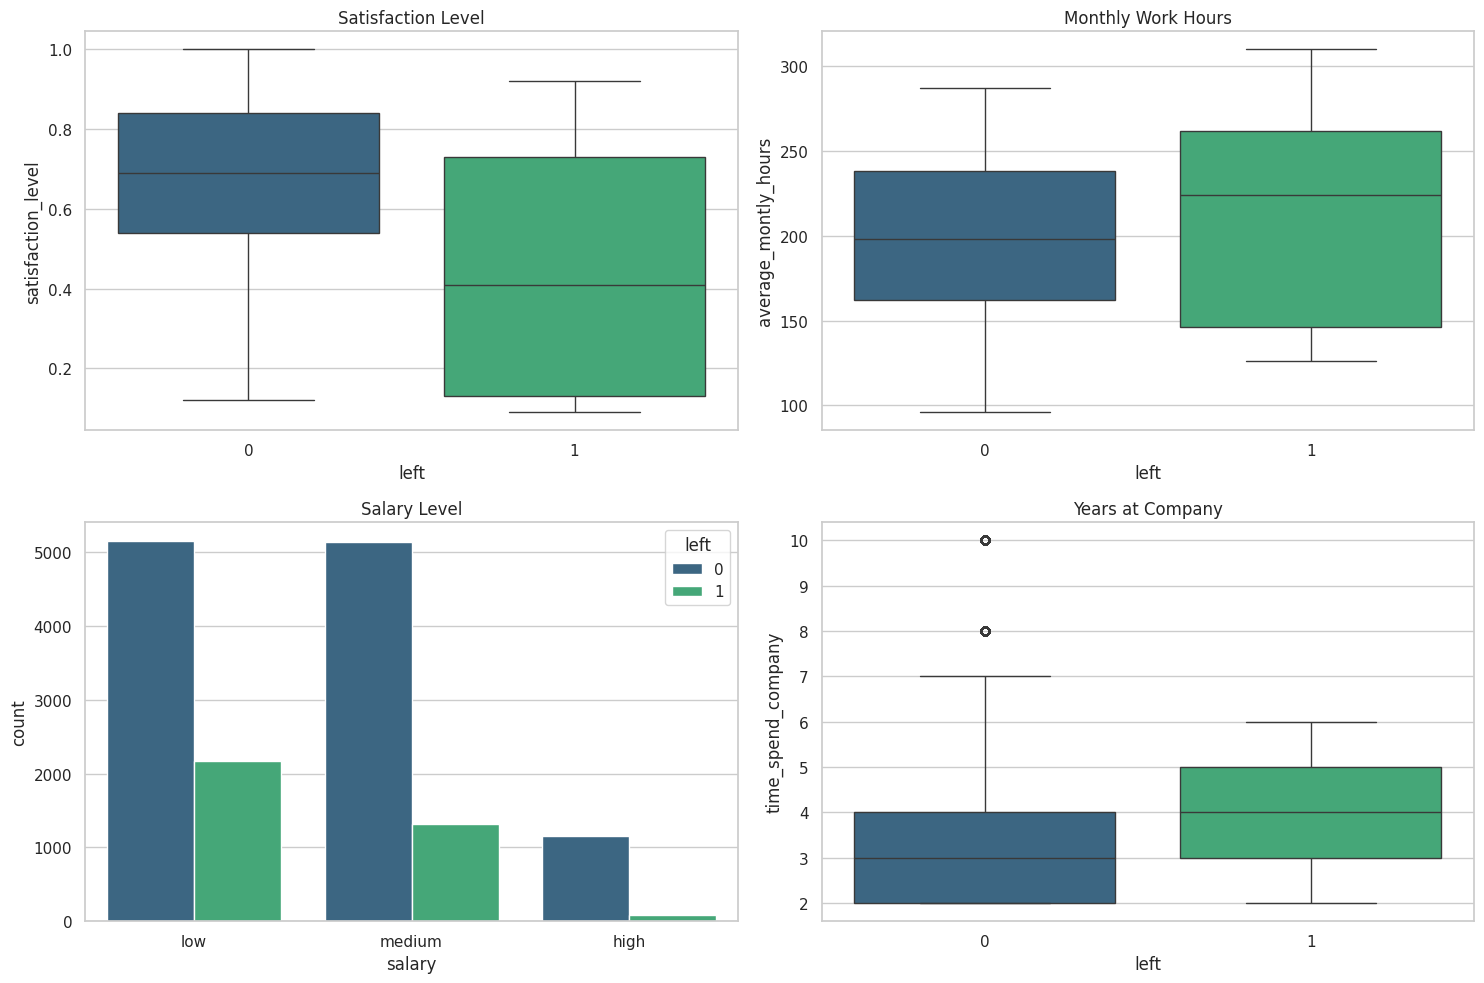

In [27]:
df = pd.read_csv('hr_analytics.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df, palette="viridis")
plt.title("Satisfaction Level")

plt.subplot(2, 2, 2)
sns.boxplot(x='left', y='average_montly_hours', data=df, palette="viridis")
plt.title("Monthly Work Hours")

plt.subplot(2, 2, 3)
sns.countplot(x='salary', hue='left', data=df, palette="viridis")
plt.title("Salary Level")

plt.subplot(2, 2, 4)
sns.boxplot(x='left', y='time_spend_company', data=df, palette="viridis")
plt.title("Years at Company")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3908037870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=project_attrition.index, y=project_attrition.values, palette="rocket")


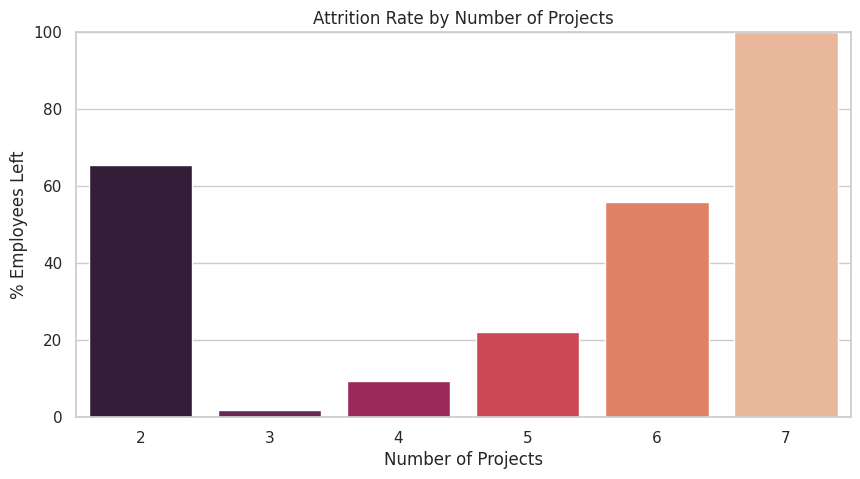

In [30]:
# Answer (b)

project_attrition = df.groupby('number_project')['left'].mean() * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=project_attrition.index, y=project_attrition.values, palette="rocket")
plt.title("Attrition Rate by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("% Employees Left")
plt.ylim(0, 100)
plt.show()